In [140]:
import findspark
findspark.init()

In [141]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum, max, month, year
import matplotlib.pyplot as plt

# Membuat SparkSession
spark = SparkSession.builder.appName("Analisis Penjualan").getOrCreate()

# Data sample
data = [('P001', 'Product A', 'Electronics', 10, 200, '2022-01-10'),
    ('P002', 'Product B', 'Electronics', 30, 150, '2022-03-11'),
    ('P003', 'Product C', 'Clothing', 20, 100, '2022-02-10'),
    ('P004', 'Product D', 'Clothing', 15, 120, '2022-02-12'),
    ('P005', 'Product E', 'Kitchen', 25, 90, '2022-04-13'),
    ('P006', 'Product F', 'Kitchen', 5, 300, '2022-01-14')]

# Membuat DataFrame PySpark
columns = ['ProductID', 'ProductName', 'Category', 'Quantity', 'Price', 'Date']
df = spark.createDataFrame(data, columns)


print("Data Penjualan Perusahaan :\n")
df.show()

Data Penjualan Perusahaan :

+---------+-----------+-----------+--------+-----+----------+
|ProductID|ProductName|   Category|Quantity|Price|      Date|
+---------+-----------+-----------+--------+-----+----------+
|     P001|  Product A|Electronics|      10|  200|2022-01-10|
|     P002|  Product B|Electronics|      30|  150|2022-03-11|
|     P003|  Product C|   Clothing|      20|  100|2022-02-10|
|     P004|  Product D|   Clothing|      15|  120|2022-02-12|
|     P005|  Product E|    Kitchen|      25|   90|2022-04-13|
|     P006|  Product F|    Kitchen|       5|  300|2022-01-14|
+---------+-----------+-----------+--------+-----+----------+



In [142]:
# Menambahkan kolom Pendapatan untuk menghitung total pendapatan
df = df.withColumn('Total_Pendapatan', df['Quantity'] * df['Price'])

# Menambahkan kolom bulan dan tahun dari kolom Date (karena tidak ada secara spesifik)
df = df.withColumn('Month', month(df['Date']))
df = df.withColumn('Year', year(df['Date']))

# Menghitung total pendapatan per kategori setiap bulan
pendapatan_kategori = df.groupBy('Category', 'Year', 'Month').agg(sum('Total_Pendapatan'))


print("Total pendapatan untuk setiap kategorinya :\n")
pendapatan_kategori.orderBy('Year', 'Month', 'Category').show()

Total pendapatan untuk setiap kategorinya :

+-----------+----+-----+---------------------+
|   Category|Year|Month|sum(Total_Pendapatan)|
+-----------+----+-----+---------------------+
|Electronics|2022|    1|                 2000|
|    Kitchen|2022|    1|                 1500|
|   Clothing|2022|    2|                 3800|
|Electronics|2022|    3|                 4500|
|    Kitchen|2022|    4|                 2250|
+-----------+----+-----+---------------------+



In [152]:
# Menghitung penjualan tertinggi per kategori
penjualan_tertinggi = df.groupBy('Category').agg(max('Quantity').alias('Penjualan'))

print("Penjualan Produk Tertinggi pada Masing-masing Kategori :\n")
penjualan_tertinggi.show()


Penjualan Produk Tertinggi pada Masing-masing Kategori :

+-----------+---------+
|   Category|Penjualan|
+-----------+---------+
|Electronics|       30|
|   Clothing|       20|
|    Kitchen|       25|
+-----------+---------+



In [145]:
# Menghitung total pendapatan per bulan dan tahun
tren_bulanan = df.groupBy('Category', 'Month').agg(sum('Quantity').alias('Penjualan Bulanan'))


print('Tren Penjualan Bulanan Pada Semua Kategori :\n')
tren_bulanan.orderBy('Month', 'Category').show()

Tren Penjualan Bulanan Pada Semua Kategori :

+-----------+-----+-----------------+
|   Category|Month|Penjualan Bulanan|
+-----------+-----+-----------------+
|Electronics|    1|               10|
|    Kitchen|    1|                5|
|   Clothing|    2|               35|
|Electronics|    3|               30|
|    Kitchen|    4|               25|
+-----------+-----+-----------------+



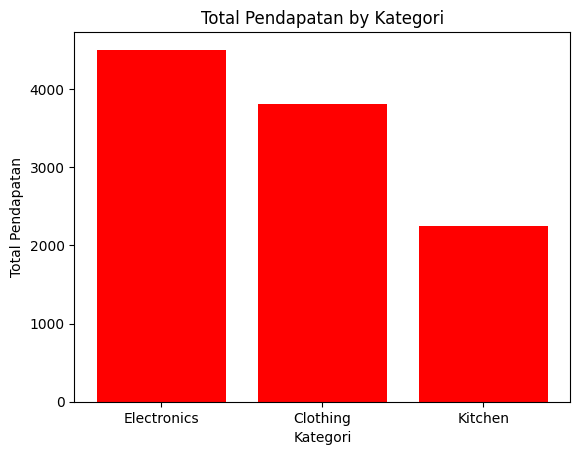

In [151]:
# Menghitung total pendapatan per kategori setiap bulan
pendapatan_kategori = df.groupBy('Category', 'Year', 'Month').agg(sum('Total_Pendapatan').alias('PendapatanBulanan'))

# Mengumpulkan hasil ke dalam Pandas DataFrame untuk visualisasi
total_pendapatan_kategori = pendapatan_kategori.toPandas()

# Membuat visualisasi menggunakan Matplotlib

plt.bar(total_pendapatan_kategori['Category'], total_pendapatan_kategori['PendapatanBulanan'], color=('red'))
plt.title('Total Pendapatan by Kategori')
plt.xlabel('Kategori')
plt.ylabel('Total Pendapatan')

# Menampilkan grafik
plt.show()